# Exercise Practice 1 - Structured Dataset



---

---





## Exploratory Data Analysis (EDA)
Exploratory Data Analysis mengacu pada proses kritis melakukan penyelidikan awal pada data untuk menemukan pola, untuk menemukan anomali, untuk menguji hipotesis (statistik inferentif) dan untuk memeriksa asumsi dengan bantuan statistik deskriptif dan representasi grafis. [source](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- Matplotlib
- Seaborn
- Pandas
- Other Plotting Library

In [5]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler,MinMaxScaler


### Exploring The Data

In [36]:
df = pd.read_csv('/content/drive/MyDrive/UTS/DATA_1/Economy1.data')

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df = df[~df.duplicated()]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 1 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                              --------------  ----- 
 0    Country ;Year ;AMA ;IMF ;Population ; Exports ; Final_consumption ; General_government ; Gross_capital ; Gross_fixed_capital ; Household_consumption ; Imports ; Total_Value;GDP   69 non-null     object
dtypes: object(1)
memory usage: 1.1+ KB


In [39]:
df.nunique()

 Country ;Year ;AMA ;IMF ;Population ; Exports ; Final_consumption ; General_government ; Gross_capital ; Gross_fixed_capital ; Household_consumption ; Imports ; Total_Value;GDP     69
dtype: int64

### Describe The Data

In [40]:
df.describe()

,Country ;Year ;AMA ;IMF ;Population ; Exports ; Final_consumption ; General_government ; Gross_capital ; Gross_fixed_capital ; Household_consumption ; Imports ; Total_Value;GDP
count,69
unique,69
top,Afghanistan ;1970;0.044998427;0.044998427;107...
freq,1


In [41]:
df

,Country ;Year ;AMA ;IMF ;Population ; Exports ; Final_consumption ; General_government ; Gross_capital ; Gross_fixed_capital ; Household_consumption ; Imports ; Total_Value;GDP
0,Afghanistan ;1970;0.044998427;0.044998427;107...
1,Afghanistan ;1971;0.044998427;0.044998427;110...
2,Afghanistan ;1972;0.044998427;0.044998427;112...
3,Afghanistan ;1973;0.044998427;0.044998427;115...
4,Afghanistan ;1974;0.044998427;0.044998427;118...
...,...
64,Albania ;1982;7;7;3041179;441832335;149542857...
65,Albania ;1983;7;7;3087911;419501686;156942857...
66,Albania ;1984;7;7;3131726;396275855;162657142...
67,Albania ;1985;7;7;3171725;377381357;163557142...


## Data collection

In [43]:
import numpy as np
import pandas as pd

datasets_1 = np.genfromtxt('/content/drive/MyDrive/UTS/DATA_1/Economy1.data', delimiter=';', dtype=str)
datasets_2 = np.genfromtxt('/content/drive/MyDrive/UTS/DATA_1/Economy1.test', delimiter=';', dtype=str, autostrip=True)

datasets_2 = np.char.strip(datasets_2, '.')

feature_and_labels_names = ["Country", "Year", "AMA", "IMF", "Population", "Exports", "Final_consumption", "General_government",
                            "Gross_capital", "Gross_fixed_capital", "Household_consumption", "Imports", "Total_Value", "GDP"]

alldata = np.concatenate((datasets_1, datasets_2), axis=0)

df = pd.DataFrame(alldata, columns=feature_and_labels_names)


In [44]:
from numpy import unique
for i in range(df.shape[1]):
    if len(np.unique(df.iloc[:, i])) <= 1:
        print(i)
    else:
        print(i, len(np.unique(df.iloc[:, i])))


0 5
1 54
2 68
3 68
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100
13 99


In [45]:
print(df.shape)
for a in feature_and_labels_names:
    df = df[df[a].str.contains('\?') == False]

print(df.shape)
df.drop_duplicates()
df.dropna()
df.isnull().sum()
print(df.shape)


(100, 14)
(100, 14)
(100, 14)


[10752971 11015857 11286753 11575305 11869879 12157386 12425267 12687301
 12938862 12986369 12486631 11155195 10088289  9951449 10243686 10512221
 10448442 10322758 10383460 10673168 10694796 10745167 12057433 14003760
 15455555 16418912 17106595 17788819 18493132 19262847 19542982 19688632
 21000256 22645130 23553551 24411191 25442944 25903301 26427199 27385307
 28189672 29249157 30466479 31541209 32716210 33753499 34636207 35643418
 36686784 37769499 38972230 40099462  2324731  2389812  2455171  2520436
  2585452  2650122  2713560  2774795  2833314  2888763  2941651  2992389
  3041179  3087911  3131726  3171725  3207128  3237676  3263019  3282182
  3295066  3302081  3303739  3300711  3293999  3284364  3271331  3253719
  3232175  3208260  3182021  3153612  3123551  3092991  3062622  3032634
  3003387  2976084  2951689  2930541  2913399  2900654  2892193  2887014
  2884102  2882481]
1     10752971
2     11015857
3     11286753
4     11575305
5     11869879
        ...   
95     2900654

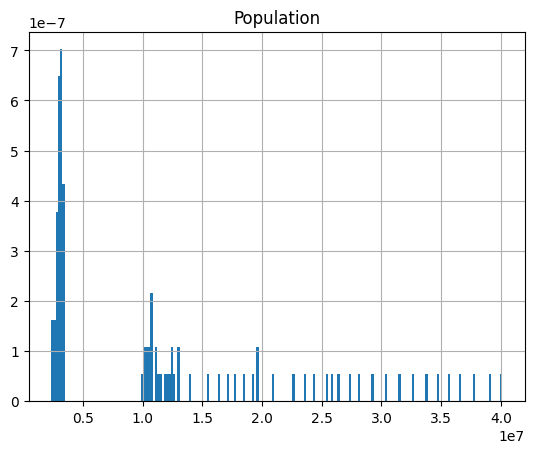

In [48]:
print(df['Population'].unique())

df['Population'] = pd.to_numeric(df['Population'], errors='coerce')

df = df.dropna(subset=['Population'])

df['Population'] = df['Population'].astype(int)

print(df['Population'])


ax = df.hist(column=['Population'], density=True, bins=200)


Removing outliers

In [49]:
np.random.seed(5)
data = df.to_numpy()
np.random.shuffle(data)
y = data[:,-1]
data =np.delete(data,[5],axis = 1)

 Feature selection is done in this step that Education-num is deleted for the repetition.

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# Assuming 'data' and 'y' are your NumPy arrays

categorical_features = [0, 1, 3, 4, 5, 6, 7, 8]  # Remove index 10 from this list
categorical_names = {}

for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_

# Assuming you want to remove the last column (index 10)
# Check the number of columns before deletion
print("Number of columns before deletion:", data.shape[1])

# Delete the last column
data = np.delete(data, 5, axis=1)

# Check the number of columns after deletion
print("Number of columns after deletion:", data.shape[1])

# Define the transformer
t = [('cat', OneHotEncoder(), [0, 1, 3, 4, 5, 6, 7, 8]), ('num', MinMaxScaler(), [2, 9, 10, 11])]

# Create the ColumnTransformer
transformer = ColumnTransformer(transformers=t)

# Use LabelEncoder for target variable 'y'
le = LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_

data = data.astype(str)

data_1 = data[0:3000]
y_1 = y[0:3000]


Number of columns before deletion: 13
Number of columns after deletion: 12


In [51]:
df

,Country,Year,AMA,IMF,Population,Exports,Final_consumption,General_government,Gross_capital,Gross_fixed_capital,Household_consumption,Imports,Total_Value,GDP
1,Afghanistan,1970,0.044998427,0.044998427,10752971,165618722,1663221269,112126986,94611818,94611818,1551094283,195277226,1731454254,1731435587
2,Afghanistan,1971,0.044998427,0.044998427,11015857,193580300,1796541240,121114833,99012350,99012350,1675426407,276296480,1812857077,1812837521
3,Afghanistan,1972,0.044998427,0.044998427,11286753,227654380,1607159399,108347543,103456794,103456794,1498811856,290370350,1647917912,1647900178
4,Afghanistan,1973,0.044998427,0.044998427,11575305,226913554,1617037233,109013455,121728433,121728433,1508023800,262962880,1702734673,1702716294
5,Afghanistan,1974,0.044998427,0.044998427,11869879,284938449,1907408182,128588961,175061875,175061875,1778819221,305679151,2061751510,2061729287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Albania,2011,1.008.949.547,1.008.949.547,2900654,3769489314,11508145916,1414665683,4049484804,3785563635,10093480232,6700292885,11210875731,12890873323
96,Albania,2012,1.081.846.446,1.081.846.446,2892193,3565034751,10941405442,1336057425,3490014921,3263346644,9605348017,5860853444,10673848869,12319779604
97,Albania,2013,1.056.686.734,1.056.686.734,2887014,3694430559,11633428651,1408648401,3584066659,3331998360,10224780250,5999410693,11145194748,12776280738
98,Albania,2014,1.054.792.341,1.054.792.341,2884102,3732084593,12201629049,1514881006,3396310872,3195768146,10686748043,6243048904,11545800489,13228240079


### Pie Diagram

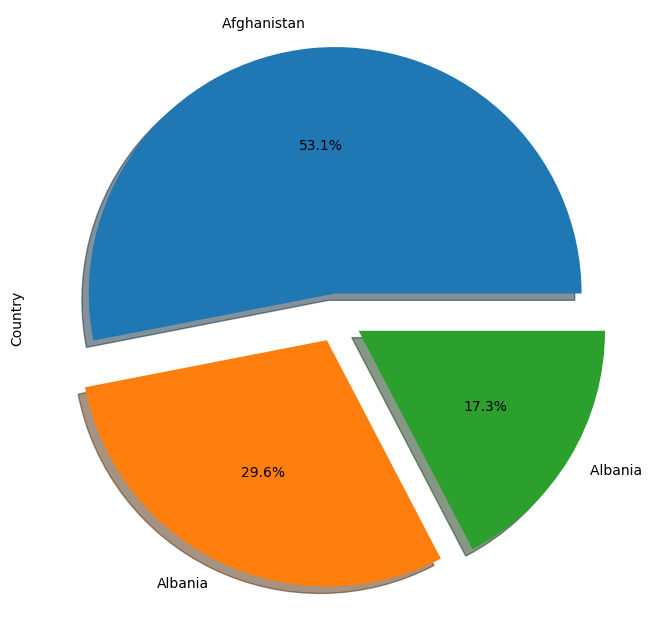

In [53]:
explode = [0.1] * len(df['Country'].value_counts())
df['Country'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', shadow=True, figsize=(10, 8))
plt.show()


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 99
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                98 non-null     object
 1   Year                   98 non-null     int64 
 2   AMA                    98 non-null     object
 3   IMF                    98 non-null     object
 4   Population             98 non-null     int64 
 5   Exports                98 non-null     object
 6   Final_consumption      98 non-null     object
 7   General_government     98 non-null     object
 8   Gross_capital          98 non-null     object
 9   Gross_fixed_capital    98 non-null     object
 10  Household_consumption  98 non-null     object
 11  Imports                98 non-null     object
 12  Total_Value            98 non-null     object
 13  GDP                    98 non-null     object
dtypes: int64(2), object(12)
memory usage: 11.5+ KB


In [55]:
df['Exports']=df['Exports'].astype(int)
df['Final_consumption']=df['Final_consumption'].astype(int)
df['General_government']=df['General_government'].astype(int)
df['Gross_capital']=df['Gross_capital'].astype(int)
df['Gross_fixed_capital']=df['Gross_fixed_capital'].astype(int)
df['Household_consumption']=df['Household_consumption'].astype(int)
df['Imports']=df['Imports'].astype(int)
df['Total_Value']=df['Total_Value'].astype(int)
df['GDP']=df['GDP'].astype(int)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 99
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                98 non-null     object
 1   Year                   98 non-null     int64 
 2   AMA                    98 non-null     object
 3   IMF                    98 non-null     object
 4   Population             98 non-null     int64 
 5   Exports                98 non-null     int64 
 6   Final_consumption      98 non-null     int64 
 7   General_government     98 non-null     int64 
 8   Gross_capital          98 non-null     int64 
 9   Gross_fixed_capital    98 non-null     int64 
 10  Household_consumption  98 non-null     int64 
 11  Imports                98 non-null     int64 
 12  Total_Value            98 non-null     int64 
 13  GDP                    98 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 11.5+ KB


### Boxplot
[Deskripsi Boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

![image.png](https://miro.medium.com/max/656/1*2c21SkzJMf3frPXPAR_gZA.png)


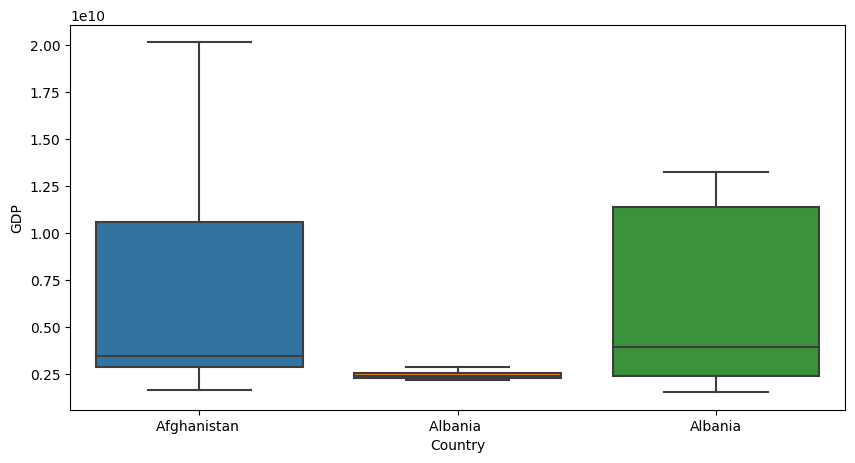

In [57]:
fig=plt.gcf()
fig.set_size_inches(10,5)

fig=sns.boxplot(x='Country', y='GDP', data=df, linewidth=1.5)

### Countplot and Barplot (with subplot)

`Countplot digunakan untuk menghitung jumlah sample, sedangkan Barplot salah satunya digunakan untuk menghitung rate/prosentase dari sample.`

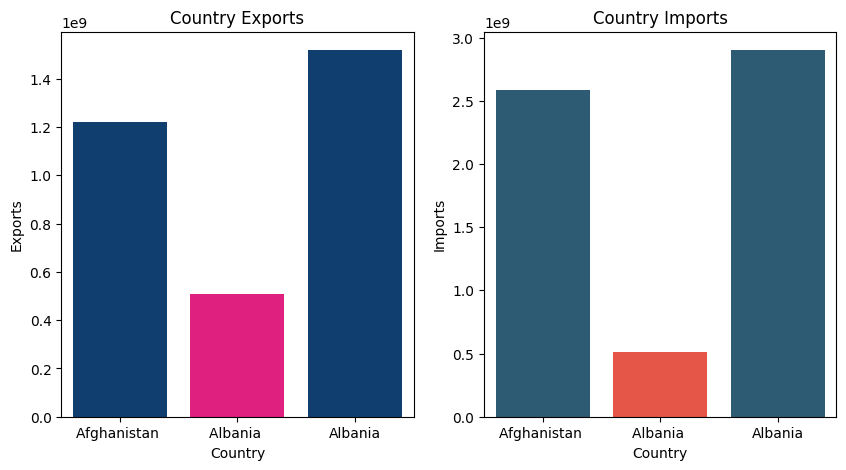

In [58]:
fig, axarr = plt.subplots(1, 2, figsize=(10,5))

axarr[0].set_title('Country Exports')
axarr[1].set_title('Country Imports')

a = sns.barplot(x='Country', y='Exports', data=df, palette=('#003f7f','#ff007f'), errorbar=None, ax=axarr[0]).set_ylabel('Exports')
b = sns.barplot(x='Country', y='Imports', data=df, palette=('#215f7f','#ff412f'), errorbar=None, ax=axarr[1]).set_ylabel('Imports')


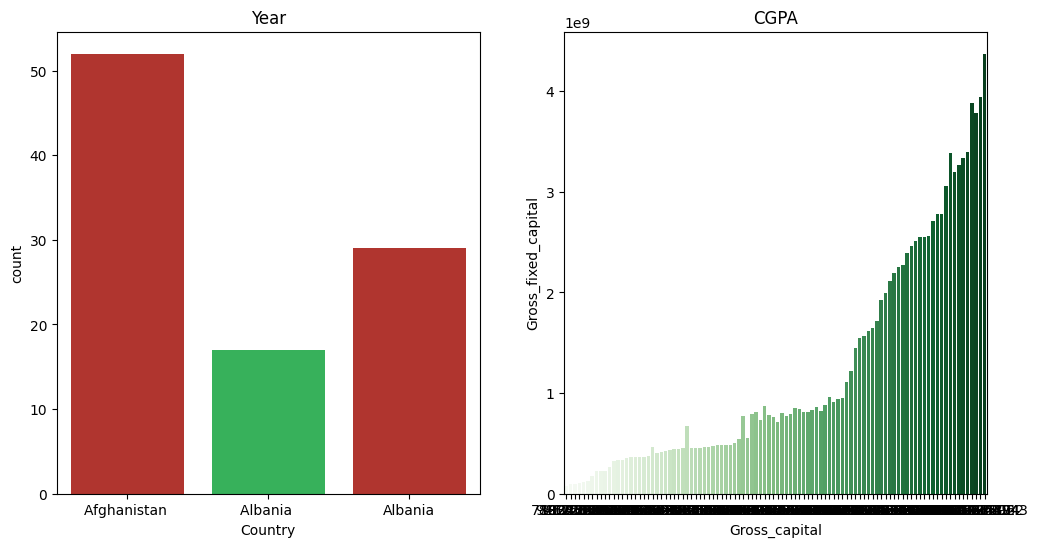

In [59]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Country', data=df, palette=('#C52219', '#23C552'), ax=axarr[0]).set_title('Year')
ax=axarr[1].set_title('CGPA')
b = sns.barplot(x='Gross_capital', y='Gross_fixed_capital', data=df, palette="Greens", errorbar=None, ax=axarr[1]).set_ylabel('Gross_fixed_capital')

## Methods for Encoding [1](https://towardsdatascience.com/how-to-encode-categorical-data-d44dde313131) & [2](https://towardsdatascience.com/5-categorical-encoding-tricks-you-need-to-know-today-as-a-data-scientist-73cf75595298) Before Modeling


- **Label Encoding** adalah pengubahan label menjadi bentuk numerik untuk mengubahnya menjadi bentuk yang dapat dibaca mesin. Algoritma pembelajaran mesin kemudian dapat memutuskan dengan cara yang lebih baik tentang bagaimana label tersebut harus dioperasikan.
- **One Hot Encoding** adalah proses yang dikenal sebagai pengkodean variabel kategori menjadi variabel dummy. Metode pengolahan data ini mengubah kolom kategorikal biner (yes / no, male / female,…) menjadi vektor biner 0/1 dimana 0 menunjukkan tidak adanya baris yang termasuk dalam kategori tersebut. Metode ini bisa rumit jika digunakan untuk variabel multidimensi non-biner yang akan menghasilkan penambahan kolom yang tidak berguna. Misalnya, jika kita memiliki kolom yang mewakili x warna, satu pengkodean panas akan menghasilkan x kolom tambahan (warna_hijau, warna_biru,…).
- dll

In [31]:
dataset = df.copy()
dataset.head()

,Sex,Age,Course,Year,CGPA,Marital_status,Depression,Anxiety,Panic_attack,Seek_specialist_treatment
1,Female,18,Engineering,1,3.00,0,1,0,1,0
2,Male,21,Islamic education,2,3.00,0,0,1,0,0
3,Male,19,BIT,1,3.00,0,1,1,1,0
4,Female,22,Laws,3,3.00,1,1,0,0,0
5,Male,23,Mathemathics,4,3.00,0,0,0,0,0


In [32]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for c in dataset.columns[1:]:
    if(dataset[c].dtype=='object'):
        dataset[c] = encoder.fit_transform(dataset[c])
    else:
        dataset[c] = dataset[c]

dataset.head()

,Sex,Age,Course,Year,CGPA,Marital_status,Depression,Anxiety,Panic_attack,Seek_specialist_treatment
1,Female,18,17,1,3,0,1,0,1,0
2,Male,21,25,2,3,0,0,1,0,0
3,Male,19,4,1,3,0,1,1,1,0
4,Female,22,33,3,3,1,1,0,0,0
5,Male,23,37,4,3,0,0,0,0,0


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 1 to 179
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sex                        118 non-null    object
 1   Age                        118 non-null    int64 
 2   Course                     118 non-null    int64 
 3   Year                       118 non-null    int64 
 4   CGPA                       118 non-null    int64 
 5   Marital_status             118 non-null    int64 
 6   Depression                 118 non-null    int64 
 7   Anxiety                    118 non-null    int64 
 8   Panic_attack               118 non-null    int64 
 9   Seek_specialist_treatment  118 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 10.1+ KB
